# Simulations

In this section, we will work with simulated data in order to explore some properties of the data. 

In [1]:
# Specparam imports
from fooof import FOOOF
from fooof.plts import plot_spectrum, plot_spectra

# Neurodsp imports
from neurodsp.spectral import compute_spectrum
from neurodsp.filt import filter_signal
from neurodsp.plts import plot_time_series

## Simulate Power Spectra

First, we will start by simulating some power spectra.

See the [simulation tutorials](https://fooof-tools.github.io/fooof/auto_examples/index.html#simulations) for guidance on simulating power spectra.

To start, simulate a power spectra, over the range of 1-40 Hz, defining an aperiodic compont reflecting pink noise, and adding an alpha peak. Visualize the power spectra and make sure it looks as you would expect. 

In [2]:
# Import simulation functions from fooof
from fooof.sim import gen_power_spectrum, gen_group_power_spectra

In [3]:
# Simulate a power spectrum
freqs, powers = gen_power_spectrum([1, 40], [1, 1], [10, 0.5, 0.5])

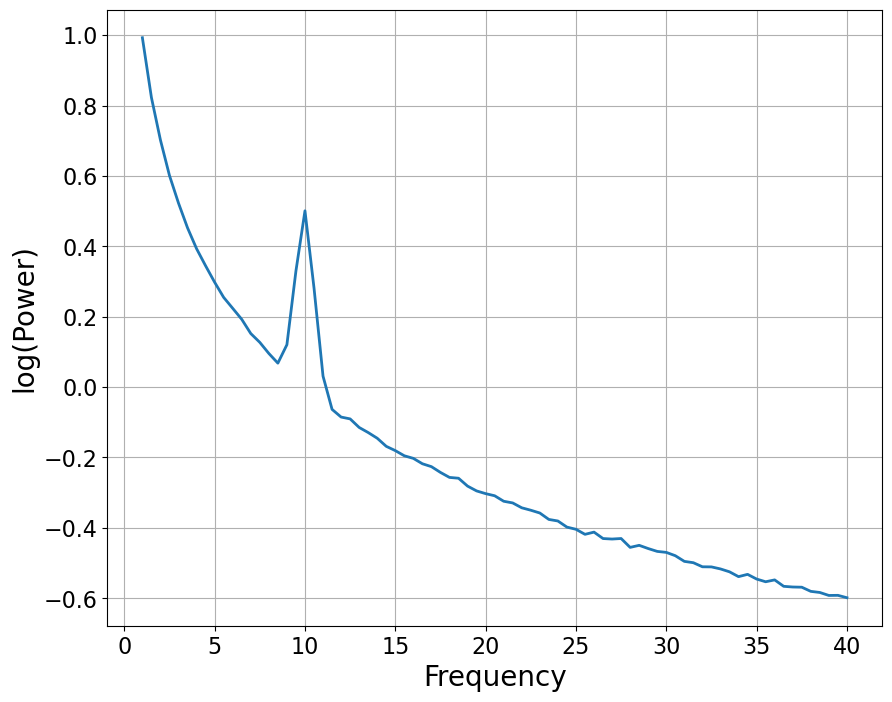

In [4]:
# Visualize the simulated power spectrum
plot_spectrum(freqs, powers, log_powers=True)

Now, fit a spectral model to our simulated power spectra.

In [5]:
# Initialize a spectral model
fm = FOOOF()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 40 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

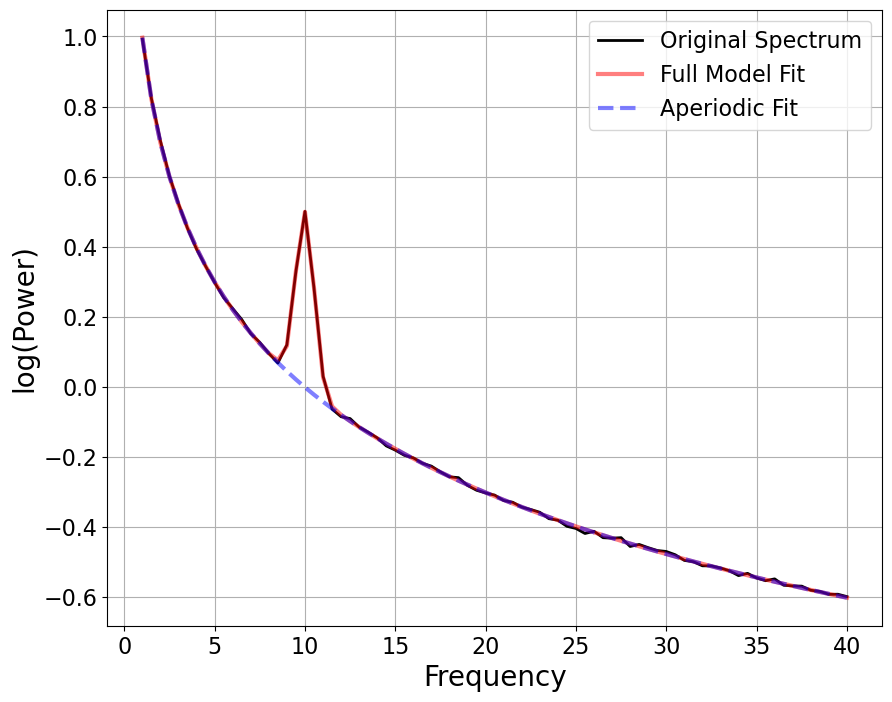

In [6]:
# Fit a spectral model to the simulated power spectrum
fm.report(freqs, powers)

Does the fitting work well (do the measured parameters match the simulated ones)?

From here, you can explore simulating and fitting different power spectra. 

Explore some different simulations and model settings - find one (or more) examples when the fitting works well, and one (or more) examples about when the fitting does not work very well. What does this tell us about the fitting procedure?

## Simulate Time Series

Next we will simulate some time series, using [neurodsp](https://neurodsp-tools.github.io). 

For guidance on simulating time series, see [simulation tutorials](https://neurodsp-tools.github.io/neurodsp/auto_tutorials/index.html#simulating-signals)

In [7]:
# Import simulation functions from neurodsp
from neurodsp.sim.periodic import sim_oscillation, sim_bursty_oscillation
from neurodsp.sim.aperiodic import sim_powerlaw, sim_synaptic_current
from neurodsp.sim.combined import sim_combined

In [8]:
# Define simulation settings
n_seconds = 10
fs = 1000

#### Simulate an oscillation

Simulate an oscillation, and visualize it. 

In [9]:
# Simulate an oscillating time series
osc = sim_oscillation(n_seconds, fs, freq=10)

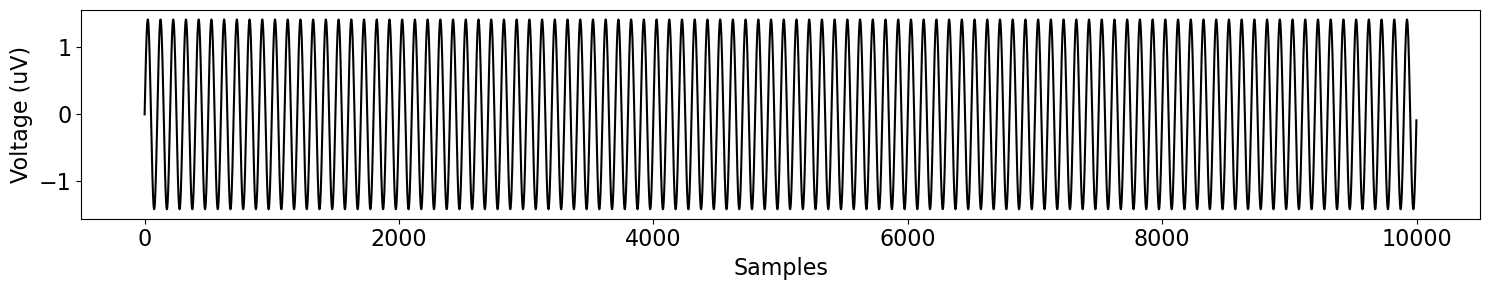

In [10]:
# Visualize the oscillating time series
plot_time_series(None, osc)

#### Simulate an aperiodic signal

Simulate a time series of aperiodic activity, and visualize it. 

In [11]:
# Simulate an aperiodic time series
pink = sim_powerlaw(n_seconds, fs, -1)

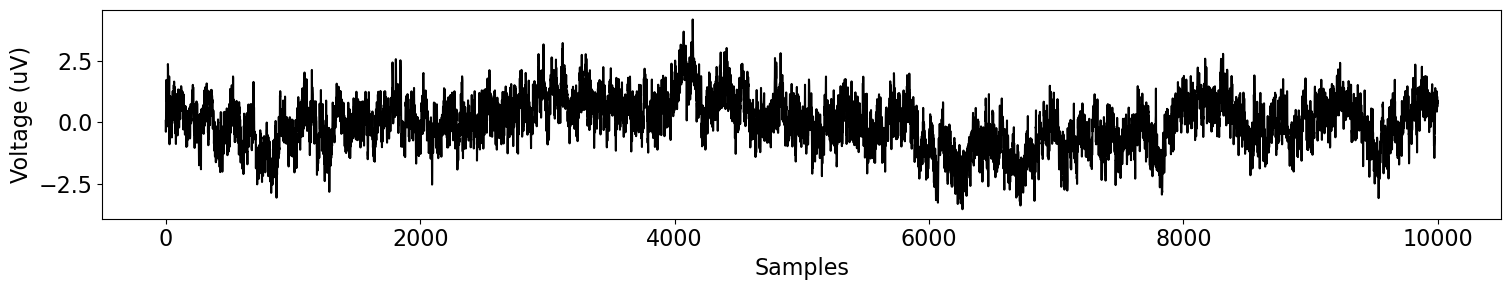

In [12]:
# Visualize the aperiodic time series
plot_time_series(None, pink)

#### Simulate a combined signal

Simulate an signal that is a combination of a periodic and aperiodic component, and visualize it. 

In [13]:
# Define the components for a combined time series
components = {
    'sim_oscillation' : {'freq' : 10},
    'sim_powerlaw' : {'exponent' : -1},
}

In [14]:
# Simulate a combined time series
sig = sim_combined(n_seconds, fs, components)

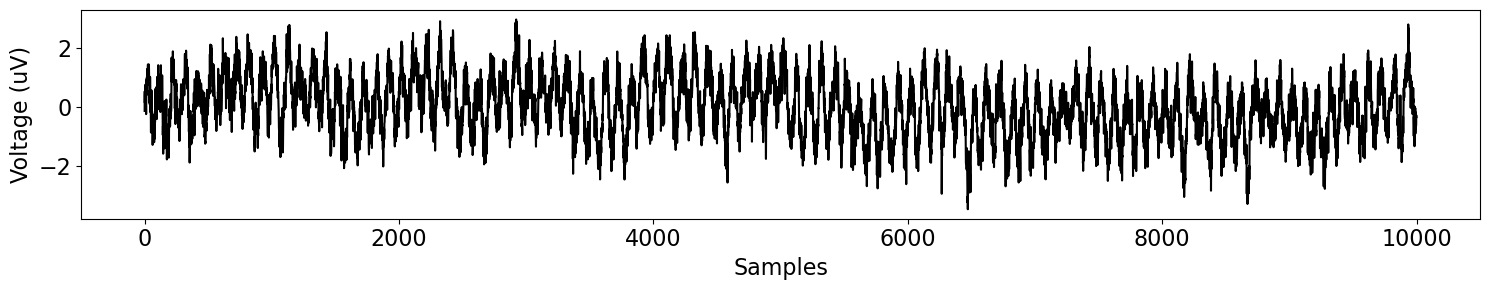

In [15]:
# Visualize the combined time series
plot_time_series(None, sig)

### Fitting Spectral Models to Simulated Signals

Compute the power spectrum and fit a spectral model to the combined signal that you just simulated. 

In [16]:
# Compute a power spectrum of the simulated combined time series
freqs, powers = compute_spectrum(sig, fs)

In [17]:
# Initialize a spectral model
fm = FOOOF()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 40 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

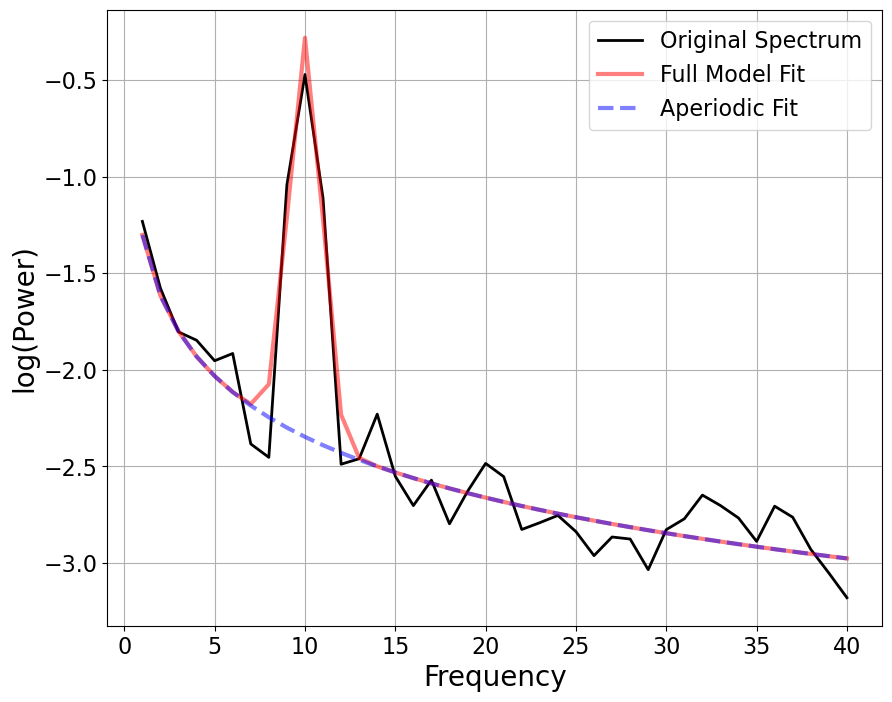

In [18]:
# Fit the spectral model to the power spectrum of the combined time series
fm.report(freqs, powers, [1, 40])

## Exploring Measures on Simulated Signals

Next, we will explore different transformations and measures that we can apply to simulated data. 

### Filtering Aperiodic Activity

- Simulate a aperiodic signal (eg. pink noise)
- Filter the simulated signal to a narrowband range (eg. the alpha range)

What does it look like? What does this show?

In [19]:
pink = sim_powerlaw(n_seconds, fs, -1)

In [20]:
filtered_pink = filter_signal(pink, fs, 'bandpass', [8, 12])

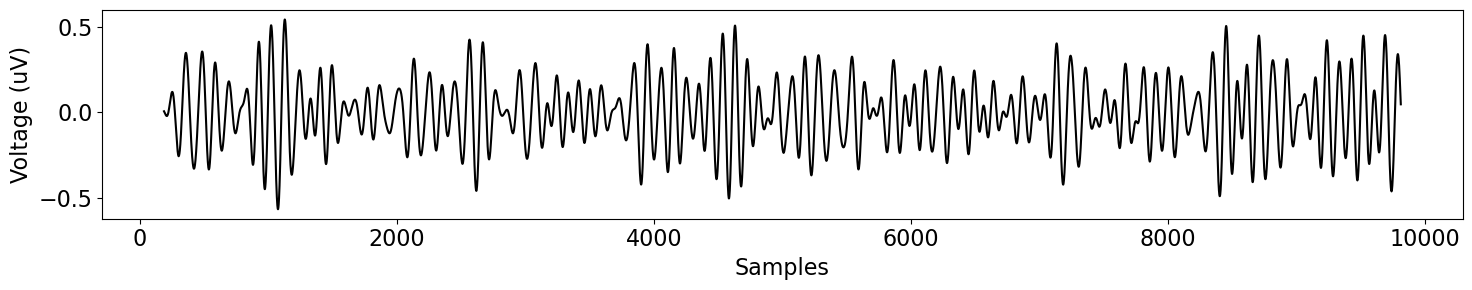

In [21]:
plot_time_series(None, filtered_pink)

### Comparing filtered narrowband ranges

- Simulate a pink noise signal
- Simulate a brown noise signal
- Apply a narrowband bandpass filter (eg. alpha: 8-12 Hz) to both signals
- Plot these signals on top of each other, to compare

Bonus: compute and compare the analytic amplitude of each of the filtered signals.

In [22]:
sig1 = sim_powerlaw(n_seconds, fs, exponent=-1)
sig2 = sim_powerlaw(n_seconds, fs, exponent=-2)

In [23]:
freqs, powers1 = compute_spectrum(sig1, fs)
freqs, powers2 = compute_spectrum(sig2, fs)

In [24]:
filt1 = filter_signal(sig1, fs, 'bandpass', (8, 12))
filt2 = filter_signal(sig2, fs, 'bandpass', (8, 12))

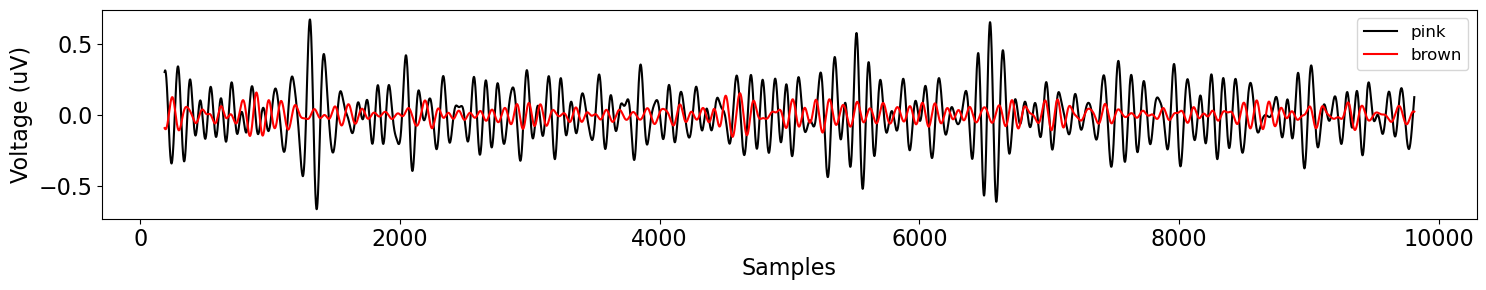

In [25]:
plot_time_series(None, [filt1, filt2], labels=['pink', 'brown'])

### Filtering Asymmetric Waveforms

- Simulate a periodic signal with asymmetric waveforms (eg. sawtooth waves)
- Filter the simulated signal to a narrowband range (eg. the alpha range)

What does it look like? What does this show?

In [26]:
sawtooths = sim_oscillation(n_seconds, fs, 10, 'sawtooth', width=0.5)

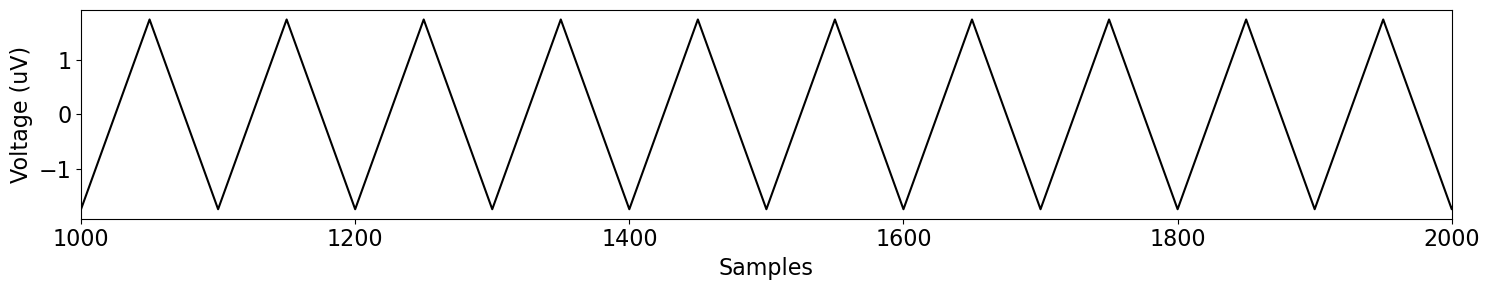

In [27]:
plot_time_series(None, sawtooths, xlim=[1000, 2000])

In [28]:
filtered_sawtooths = filter_signal(sawtooths, fs, 'bandpass', [8, 12])

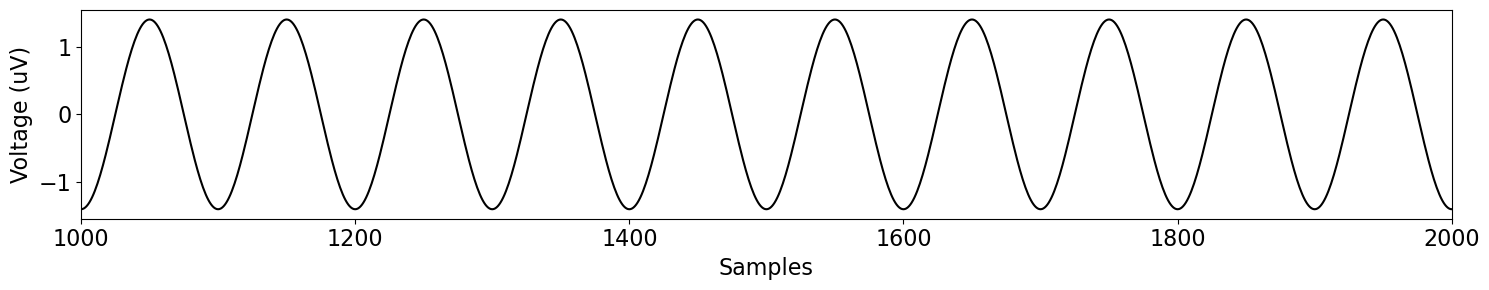

In [29]:
plot_time_series(None, filtered_sawtooths, xlim=[1000, 2000])

## Conclusion

In the above, we explored simulating data (including power spectra and time series), and using these simulations to test and explore different method properties.

Note that in the above we only scratched the surface of what can be explored using simulated data. In general, simulating data with different properties and exploring the outputs of different transforms and analysis methods is a useful strategy for exploring how these methods work and gaining an intuition for this kind of data. 

To further explore, think of some other method or idea you can test, and use some simulations to do so. 